In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from xgboost.sklearn import XGBRegressor
import sklearn.linear_model as slm
from sklearn.linear_model import BayesianRidge

## MODEL 1

In [2]:
#Raw Data
# Load the raw data into a Pandas DataFrame
data = pd.read_csv('credit_risk_data_v2.csv')

# Clean and preprocess the data
# Handle missing values
data = data.dropna()

In [3]:
# Encode categorical variables
categorical_cols = ['term','home_ownership', 'verification_status']
data = pd.get_dummies(data, columns=categorical_cols)

# Scale the numerical variables
numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']
data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()

data = data.reset_index(drop=True)
# Split the data into X (features) and y (target variable)
#X = data.drop('default', axis=1)
#y = data['default']

In [4]:
# Definir X e Y
X = data.drop(['status'], axis=1)
Y = data['status']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()

In [5]:
# Entrenar el modelo de regresión logística
model.fit(X_train, Y_train)

C:\Users\danny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9407304937159525


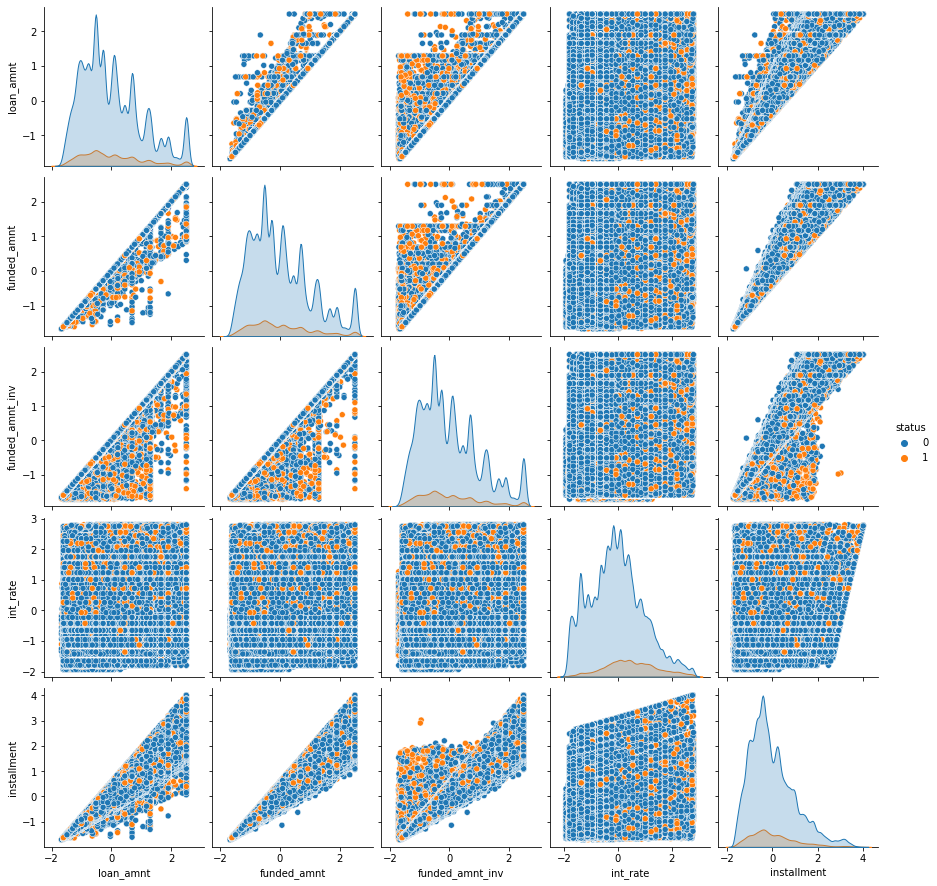

In [7]:
predictors = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment'][0:100]
sns.pairplot(data, vars=predictors, hue='status')
plt.show()

## MODEL 2

In [10]:
model = BayesianRidge()
model.fit(X_train, Y_train)
# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred.round())
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9136747737313945


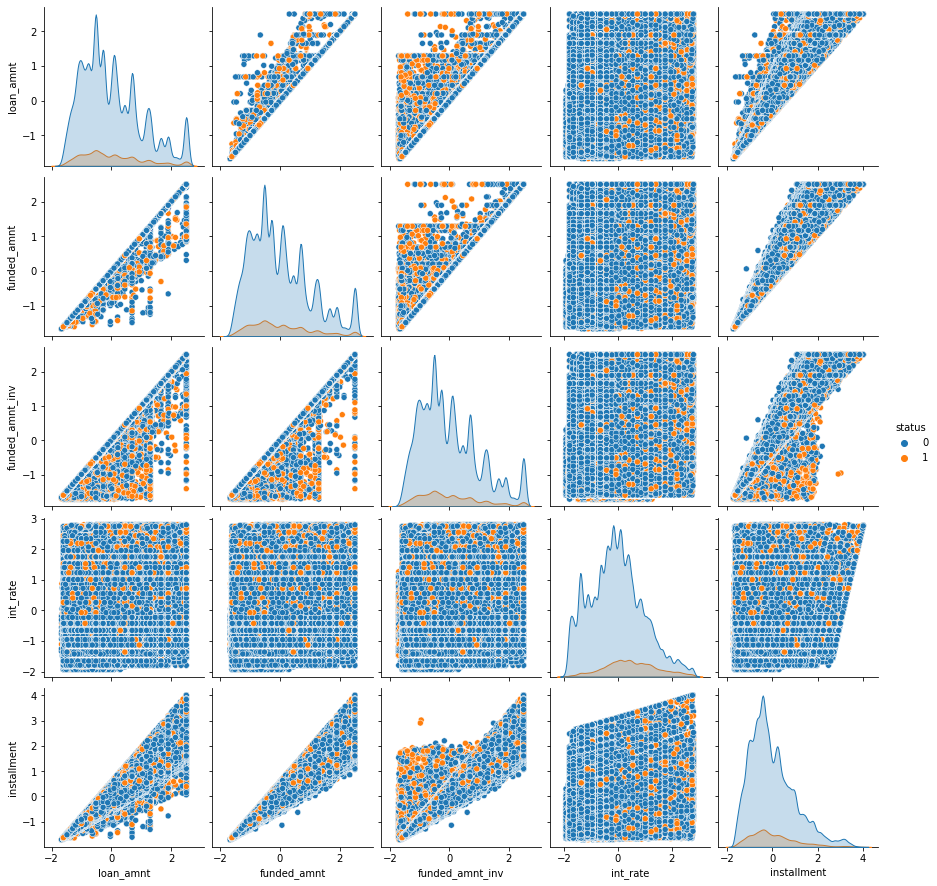

In [11]:
predictors = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment'][0:100]
sns.pairplot(data, vars=predictors, hue='status')
plt.show()

## MODEL 3

In [12]:
model = XGBRegressor()
model.fit(X_train, Y_train)
# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred.round())
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9558079183288294


In [ ]:
predictors = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment'][0:100]
sns.pairplot(data, vars=predictors, hue='status')
plt.show()